In [ ]:
# TODO: Import libraries required here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split


In [ ]:
# Using MNIST dataset: 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (CNN expects 3D inputs)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
# Each image is 28×28 pixels, grayscale (1 channel).
# Normalization helps the model learn faster.

Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


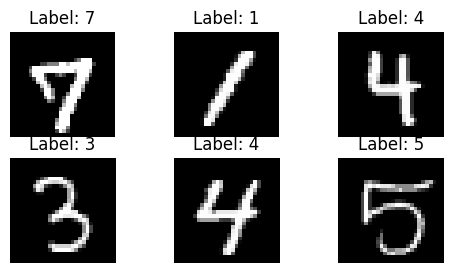

In [ ]:
# Show images
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# What do you notice about how similar some digits look?
# Things to think about: What do you notice about how similar some digits look?

In [ ]:
#Building a simple CNN

model = models.Sequential([
    # TODO: Add first Conv2D layer (32 filters, 3x3 kernel, 'relu', input_shape=(28,28,1))
    # layers.Conv2D(...),

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    # TODO: Add MaxPooling layer (2x2)
    layers.MaxPooling2D(2, 2),

    # TODO: Add second Conv2D layer (64 filters, 3x3, 'relu')
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),

    # TODO: Add second MaxPooling layer
    layers.MaxPooling2D(2,2),

    #I added another convolution model to try and monipulate the higher accuracy value intially provided by the model.
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),

    # TODO: Add Dense layer with 64 units, 'relu' activation
    layers.Dense(64, activation='relu'),

    # TODO: Add final Dense layer with 10 units, 'softmax' activation
    layers.Dense(10, activation='softmax')
])

model.summary()

# Exercise:
# Why do early layers detect edges and later layers detect shapes? Discuss.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model

# TODO: Compile the model using:
# optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=7,          # Decreased number of epochs of training to manipulate accuracy value.
                    batch_size=64,
                    validation_split=0.2, # 10% data for validation intially but increased to 20%
                    verbose=2)

Epoch 1/7
750/750 - 7s - 10ms/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy: 0.9858 - val_loss: 0.0627
Epoch 2/7
750/750 - 3s - 4ms/step - accuracy: 0.9981 - loss: 0.0061 - val_accuracy: 0.9877 - val_loss: 0.0525
Epoch 3/7
750/750 - 3s - 3ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9894 - val_loss: 0.0506
Epoch 4/7
750/750 - 3s - 3ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9891 - val_loss: 0.0493
Epoch 5/7
750/750 - 3s - 4ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9916 - val_loss: 0.0393
Epoch 6/7
750/750 - 3s - 4ms/step - accuracy: 0.9976 - loss: 0.0066 - val_accuracy: 0.9902 - val_loss: 0.0446
Epoch 7/7
750/750 - 3s - 3ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9907 - val_loss: 0.0478


In [ ]:
#At first, the accuracy that I have was close to 0.98.
#This is not a great result as a higher accuracy would mean that the model has likely
#over-fitted with the training data.
# I have decided to try to decrease the number of epochs the model processes through,
#and even one of the convolution layers and pooling to reduce the number of feature extractions performed
#by the model. I also increased the validation data set, so that the model learns more on the trainind data set, and changes the accuracy value.

In [ ]:
# Evaluate the Model

# TODO: Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"\nTest accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0923

Test accuracy: 0.989


In [ ]:
# Make Predictions

# TODO: Predict the first 9 test images
predictions = model.predict(x_test[:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


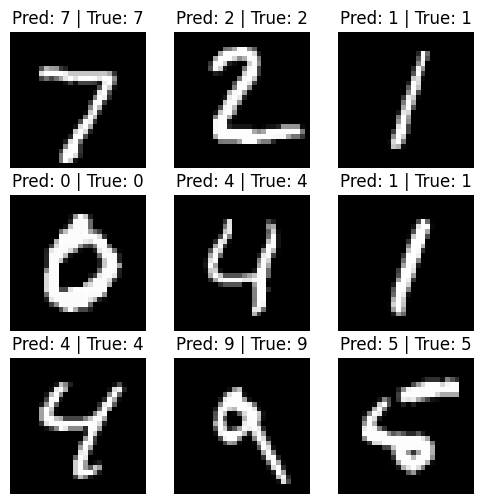

In [ ]:
import numpy as np

# Get predictions for all test samples (outside the plotting loop)
preds = model.predict(x_test)              # preds.shape: (num_samples, num_classes)
pred_classes = np.argmax(preds, axis=1)    # Class with highest probability

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]} | True: {y_test[i]}")
    plt.axis('off')
plt.show()
